## **Data Collection**

+ Data collection with scrapping data

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(pd.__version__)
#1.2.4

1.4.3


# San Diego Data analysis

In [3]:
weburl = "http://www.caiso.com/planning/Pages/ReliabilityRequirements/Default.aspx"
req_data = requests.get(weburl)

# Scrapping all the content from the page
soup = BeautifulSoup(req_data.content, "lxml")
historical_data = soup.find_all('a', {'class' : 'ISOTreeNodeTxt'})

ems_load_dict = {}
hourly_data = []
for text in historical_data:
    file_link = text['href']
    if "HistoricalEMS" in file_link:
        print(file_link)
        file_string = file_link.strip('.xlsx')
        load_year = file_string[-4:]
        if(load_year == '2022'):
            month = file_string.strip("/Documents/HistoricalEMSHourlyLoadfor")
            ems_load_dict['ems_load_' + month] = pd.read_excel('http://www.caiso.com'+file_link)
        else:
            ems_load_dict['ems_load_' + load_year] = pd.read_excel('http://www.caiso.com'+file_link)

/Documents/HistoricalEMSHourlyLoadforMay2022.xlsx
/Documents/HistoricalEMSHourlyLoadforApril2022.xlsx
/Documents/HistoricalEMSHourlyLoadforMarch2022.xlsx
/Documents/HistoricalEMSHourlyLoadforFebruary2022.xlsx
/Documents/HistoricalEMSHourlyLoadforJanuary2022.xlsx
/Documents/HistoricalEMSHourlyLoad-2021.xlsx
/Documents/HistoricalEMSHourlyLoad-2020.xlsx
/Documents/HistoricalEMSHourlyLoad-2019.xlsx


In [4]:
# Checking all the dictionary keys
ems_load_dict.keys()

dict_keys(['ems_load_2022', 'ems_load_April2022', 'ems_load_h2022', 'ems_load_February2022', 'ems_load_January2022', 'ems_load_2021', 'ems_load_2020', 'ems_load_2019'])

In [5]:
# Collecting the only keys needed
ems_load_dict['ems_load_2022'] = pd.concat([ems_load_dict['ems_load_April2022'], ems_load_dict['ems_load_h2022'], ems_load_dict['ems_load_February2022'], ems_load_dict['ems_load_January2022']])
ems_load_dict.pop("ems_load_April2022")
ems_load_dict.pop("ems_load_h2022")
ems_load_dict.pop("ems_load_February2022")
ems_load_dict.pop("ems_load_January2022")
ems_load_dict.keys()

dict_keys(['ems_load_2022', 'ems_load_2021', 'ems_load_2020', 'ems_load_2019'])

## **Data Cleaning**

In [6]:
# Clearing out the dataset and separating them into yearwise groups
ems_load_dict['ems_load_2019'] = ems_load_dict['ems_load_2019'].loc[:, ~ems_load_dict['ems_load_2019'].columns.str.contains('^Unnamed')]
ems_load_dict['ems_load_2020'] = ems_load_dict['ems_load_2020'].loc[:, ~ems_load_dict['ems_load_2020'].columns.str.contains('^Unnamed')]
ems_load_dict['ems_load_2021'] = ems_load_dict['ems_load_2021'].loc[:, ~ems_load_dict['ems_load_2021'].columns.str.contains('^Unnamed')]
ems_load_dict['ems_load_2022'] = ems_load_dict['ems_load_2022'].loc[:, ~ems_load_dict['ems_load_2022'].columns.str.contains('^Unnamed')]

In [7]:
ems_load_dict['ems_load_2021']

,Date,HR,PGE,SCE,SDGE,VEA,CAISO
0,2021-01-01,1,9644.626113,9684.683244,2042.953594,74.968230,21447.230233
1,2021-01-01,2,9252.452737,9315.383429,1939.956055,75.012477,20582.803317
2,2021-01-01,3,8977.654678,9013.844377,1862.010128,76.598081,19930.106541
3,2021-01-01,4,8829.848429,8883.722853,1829.313819,78.424049,19621.308843
4,2021-01-01,5,8845.554648,8851.989695,1831.501660,81.842981,19610.888536
...,...,...,...,...,...,...,...
8755,2021-12-31,20,12160.480000,11698.090000,2565.490000,88.360000,26512.410000
8756,2021-12-31,21,11823.130000,11382.810000,2470.360000,87.210000,25763.510000
8757,2021-12-31,22,11468.940000,11088.230000,2373.370000,89.850000,25020.390000
8758,2021-12-31,23,11029.680000,10697.690000,2257.010000,91.260000,24075.630000


In [8]:
# Renaming the columns
ems_load_dict['ems_load_2021'].rename(columns = {'CAISO':'CAISO Total'}, inplace = True)
ems_load_dict['ems_load_2022'].rename(columns = {'CAISO':'CAISO Total'}, inplace = True)
ems_load_dict['ems_load_2022']

,Date,HR,PGE,SCE,SDGE,VEA,CAISO Total
0,2022-04-01,1,9549.556200,9479.826174,1900.281354,44.122251,20973.785935
1,2022-04-01,2,9220.054919,9143.137983,1861.725438,42.650355,20267.569029
2,2022-04-01,3,9031.770047,9007.321166,1835.670251,42.355261,19917.118338
3,2022-04-01,4,9011.632050,8999.102576,1749.099336,43.769468,19803.608205
4,2022-04-01,5,9178.883600,9168.396715,1774.084492,46.193371,20167.559095
...,...,...,...,...,...,...,...
739,2022-01-31,20,12899.161550,12280.193430,2662.076311,84.882883,27926.313990
740,2022-01-31,21,12661.928880,12000.423610,2551.043939,84.209644,27297.606400
741,2022-01-31,22,12176.019220,11482.011080,2444.719045,81.704147,26184.452933
742,2022-01-31,23,11428.970710,10828.295260,2278.196798,78.536038,24613.998889


In [9]:
emsdata = pd.concat(ems_load_dict, axis='rows', ignore_index=True)
emsdata = emsdata.drop(['HE'], axis = 1)
emsdata = emsdata.sort_values('Date')
emsdata.head()

,Date,HR,PGE,SCE,SDGE,VEA,CAISO Total
20445,2019-01-01,NaN,10543.794826,10829.111952,2372.497411,95.325563,23840.729338
20443,2019-01-01,NaN,11649.592015,11893.453736,2698.751137,99.887433,26341.684324
20442,2019-01-01,NaN,11875.814143,11992.329483,2777.672120,99.879848,26745.695312
20441,2019-01-01,NaN,11997.283952,12030.146692,2799.193829,99.243393,26925.868961
20440,2019-01-01,NaN,11688.500889,11692.302915,2761.883322,98.852646,26241.540105


In [10]:
emsdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29183 entries, 20445 to 703
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         29183 non-null  datetime64[ns]
 1   HR           11639 non-null  float64       
 2   PGE          29183 non-null  float64       
 3   SCE          29183 non-null  float64       
 4   SDGE         29183 non-null  float64       
 5   VEA          29183 non-null  float64       
 6   CAISO Total  29183 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.8 MB


In [11]:
emsdata.isnull().sum()

Date               0
HR             17544
PGE                0
SCE                0
SDGE               0
VEA                0
CAISO Total        0
dtype: int64

In [12]:
def f(x):
     return pd.Series(dict(Date = x['Date'].min(), 
                        SDGE =x['SDGE'].sum(),
                        ))

ems_daily_data = emsdata.groupby('Date').apply(f) 
ems_daily_data['Year'] = ems_daily_data['Date'].dt.year
ems_daily_data

,Date,SDGE,Year
Date,,,
2019-01-01,2019-01-01,48485.355385,2019
2019-01-02,2019-01-02,56532.901573,2019
2019-01-03,2019-01-03,57024.675624,2019
2019-01-04,2019-01-04,56456.888148,2019
2019-01-05,2019-01-05,55838.513720,2019
...,...,...,...
2022-04-26,2022-04-26,46399.542960,2022
2022-04-27,2022-04-27,44594.505611,2022
2022-04-28,2022-04-28,46513.391923,2022


In [13]:
ems_daily_data.describe()

,SDGE,Year
count,1216.000000,1216.000000
mean,51619.106930,2020.197368
std,6669.066689,0.978212
min,38976.820000,2019.000000
25%,47288.407669,2019.000000
50%,50523.729989,2020.000000
75%,54570.108690,2021.000000
max,80187.132613,2022.000000


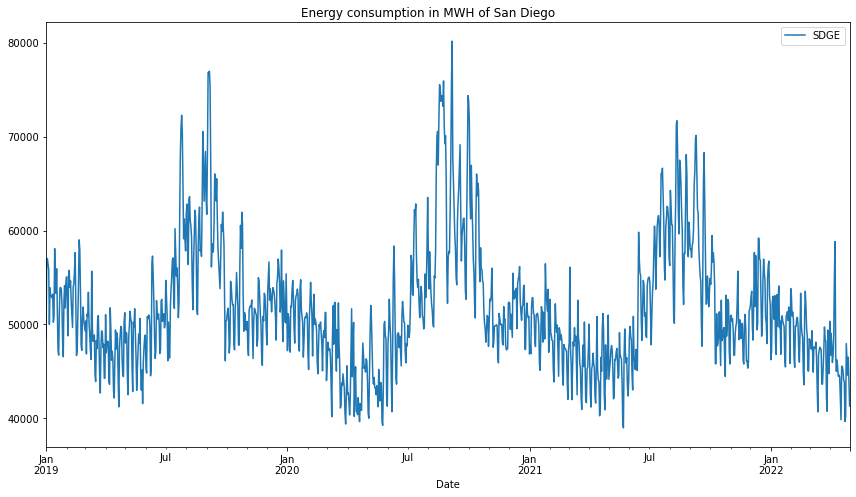

In [14]:
ems_daily_data[['SDGE']].plot(subplots = True, figsize = (12,7))
[ax.legend(loc = 1) for ax in plt.gcf().axes]
plt.suptitle('Energy consumption in MWH of San Diego')
plt.tight_layout()
plt.subplots_adjust(top = 0.95)

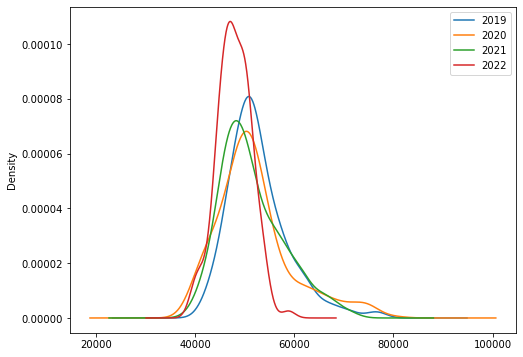

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in ems_daily_data.groupby('Year'):
    df['SDGE'].plot(kind="kde", ax=ax, label=label)
plt.legend()

In [16]:
import calendar

def season_calc(month):
    if month in [6,7,8,9,10]:
        return "summer"
    else:
        return "winter"
    
weeknames = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
ems_daily_data['Dates'] = ems_daily_data['Date']
ems_daily_data['Date'] = ems_daily_data.Dates.dt.date
ems_daily_data['Month'] = ems_daily_data.Dates.dt.month
ems_daily_data['Day'] = ems_daily_data.Dates.dt.day
ems_daily_data['Week_day'] = ems_daily_data.Dates.dt.weekday.map(weeknames)
ems_daily_data['Season'] = ems_daily_data.Dates.dt.month.apply(season_calc)

In [17]:
from pandas.tseries.holiday import USFederalHolidayCalendar
import datetime

cal = USFederalHolidayCalendar()
holiday_list = []
holidays = cal.holidays(start = ems_daily_data['Date'].min(), end = ems_daily_data['Date'].max())

def get_holidays(dt, holidays):
    if dt.strftime("%Y-%m-%d") in holidays:
        return 1
    else:
        return 0

ems_daily_data['Holiday'] = ems_daily_data.apply(lambda row: get_holidays(row['Date'], holidays), axis=1)
ems_daily_data

,Date,SDGE,Year,Dates,Month,Day,Week_day,Season,Holiday
Date,,,,,,,,,
2019-01-01,2019-01-01,48485.355385,2019,2019-01-01,1,1,Tuesday,winter,1
2019-01-02,2019-01-02,56532.901573,2019,2019-01-02,1,2,Wednesday,winter,0
2019-01-03,2019-01-03,57024.675624,2019,2019-01-03,1,3,Thursday,winter,0
2019-01-04,2019-01-04,56456.888148,2019,2019-01-04,1,4,Friday,winter,0
2019-01-05,2019-01-05,55838.513720,2019,2019-01-05,1,5,Saturday,winter,0
...,...,...,...,...,...,...,...,...,...
2022-04-26,2022-04-26,46399.542960,2022,2022-04-26,4,26,Tuesday,winter,0
2022-04-27,2022-04-27,44594.505611,2022,2022-04-27,4,27,Wednesday,winter,0
2022-04-28,2022-04-28,46513.391923,2022,2022-04-28,4,28,Thursday,winter,0


In [18]:
#adding in another column which indicates 'non-working' days which include weekends and holidays
ems_daily_data['Non_working'] = ems_daily_data.apply(lambda x: 'non-working' if \
                                         ((x['Holiday'] == 1) or (x['Week_day'] in ['Saturday', 'Sunday']))
                                         else 'working', axis = 1)

In [19]:
ems_daily_data.to_csv('ems_daily_data.csv', index=False)

In [20]:
ems_weather_data = pd.read_csv('sdge_climate_data.csv')
ems_weather_data.head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
0,72290023188,2019-01-01,FM-15,7,NaN,NW,0.2,mi,TEMP,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23-08-2007
1,72290023188,2019-01-01,FM-15,7,NaN,NW,0.2,mi,TEMP,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23-08-2007
2,72290023188,2019-01-01,FM-15,7,NaN,NW,0.2,mi,TEMP,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23-08-2007
3,72290023188,2019-01-01,FM-15,7,NaN,NW,0.2,mi,TEMP,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23-08-2007
4,72290023188,2019-01-01,FM-12,4,NaN,NW,0.2,mi,TEMP,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23-08-2007


In [21]:
ems_data_df = ems_weather_data[['STATION', 'DATE', 'DailyCoolingDegreeDays','DailyHeatingDegreeDays', 'HourlyDryBulbTemperature']]

In [22]:
ems_data_df['DATE'] = pd.to_datetime(ems_data_df['DATE'])
ems_data_df.head()

,STATION,DATE,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature
0,72290023188,2019-01-01,NaN,NaN,49.0
1,72290023188,2019-01-01,NaN,NaN,47.0
2,72290023188,2019-01-01,NaN,NaN,47.0
3,72290023188,2019-01-01,NaN,NaN,47.0
4,72290023188,2019-01-01,NaN,NaN,47.0


In [23]:
ems_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41533 entries, 0 to 41532
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   STATION                   41533 non-null  int64         
 1   DATE                      41533 non-null  datetime64[ns]
 2   DailyCoolingDegreeDays    1216 non-null   float64       
 3   DailyHeatingDegreeDays    1216 non-null   float64       
 4   HourlyDryBulbTemperature  40274 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


In [24]:
ems_data_df[['DailyCoolingDegreeDays','DailyHeatingDegreeDays']] = ems_data_df[['DailyCoolingDegreeDays','DailyHeatingDegreeDays']].fillna(method='bfill')
ems_data_df = ems_data_df.fillna(method='ffill')

ems_data_df[ems_data_df.isna().any(axis=1)].sum()

STATION                     0.0
DailyCoolingDegreeDays      0.0
DailyHeatingDegreeDays      0.0
HourlyDryBulbTemperature    0.0
dtype: float64

In [25]:
ems_data_df['DailyCoolingDegreeDays'] = pd.to_numeric(ems_data_df['DailyCoolingDegreeDays'], errors='coerce')
ems_data_df['DailyHeatingDegreeDays'] = pd.to_numeric(ems_data_df['DailyHeatingDegreeDays'], errors='coerce')
ems_data_df['HourlyDryBulbTemperature'] = pd.to_numeric(ems_data_df['HourlyDryBulbTemperature'], errors='coerce')

In [26]:
daily_weather = ems_data_df.set_index('DATE').resample('D').mean()
daily_weather.head()

,STATION,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature
DATE,,,,
2019-01-01,7.229002e+10,0.0,12.0,52.344828
2019-01-02,7.229002e+10,0.0,13.0,52.068966
2019-01-03,7.229002e+10,0.0,12.0,53.333333
2019-01-04,7.229002e+10,0.0,12.0,53.551724
2019-01-05,7.229002e+10,0.0,9.0,55.793103


In [27]:
daily_weather = daily_weather.reset_index()

In [28]:
ems_daily_data_df = pd.read_csv('ems_daily_data.csv')
ems_daily_data_df['Date'] = pd.to_datetime(ems_daily_data_df['Date'])
ems_daily_data_df

,Date,SDGE,Year,Dates,Month,Day,Week_day,Season,Holiday,Non_working
0,2019-01-01,48485.355385,2019,2019-01-01,1,1,Tuesday,winter,1,non-working
1,2019-01-02,56532.901573,2019,2019-01-02,1,2,Wednesday,winter,0,working
2,2019-01-03,57024.675624,2019,2019-01-03,1,3,Thursday,winter,0,working
3,2019-01-04,56456.888148,2019,2019-01-04,1,4,Friday,winter,0,working
4,2019-01-05,55838.513720,2019,2019-01-05,1,5,Saturday,winter,0,non-working
...,...,...,...,...,...,...,...,...,...,...
1211,2022-04-26,46399.542960,2022,2022-04-26,4,26,Tuesday,winter,0,working
1212,2022-04-27,44594.505611,2022,2022-04-27,4,27,Wednesday,winter,0,working
1213,2022-04-28,46513.391923,2022,2022-04-28,4,28,Thursday,winter,0,working
1214,2022-04-29,43917.675495,2022,2022-04-29,4,29,Friday,winter,0,working


In [29]:
merged_sdge_data = pd.merge(ems_daily_data_df, daily_weather, how = 'outer', left_on = 'Date', right_on= 'DATE')
merged_sdge_data

,Date,SDGE,Year,Dates,Month,Day,Week_day,Season,Holiday,Non_working,DATE,STATION,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature
0,2019-01-01,48485.355385,2019,2019-01-01,1,1,Tuesday,winter,1,non-working,2019-01-01,7.229002e+10,0.0,12.0,52.344828
1,2019-01-02,56532.901573,2019,2019-01-02,1,2,Wednesday,winter,0,working,2019-01-02,7.229002e+10,0.0,13.0,52.068966
2,2019-01-03,57024.675624,2019,2019-01-03,1,3,Thursday,winter,0,working,2019-01-03,7.229002e+10,0.0,12.0,53.333333
3,2019-01-04,56456.888148,2019,2019-01-04,1,4,Friday,winter,0,working,2019-01-04,7.229002e+10,0.0,12.0,53.551724
4,2019-01-05,55838.513720,2019,2019-01-05,1,5,Saturday,winter,0,non-working,2019-01-05,7.229002e+10,0.0,9.0,55.793103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2022-04-26,46399.542960,2022,2022-04-26,4,26,Tuesday,winter,0,working,2022-04-26,7.229002e+10,0.0,2.0,62.656250
1212,2022-04-27,44594.505611,2022,2022-04-27,4,27,Wednesday,winter,0,working,2022-04-27,7.229002e+10,0.0,4.0,60.272727
1213,2022-04-28,46513.391923,2022,2022-04-28,4,28,Thursday,winter,0,working,2022-04-28,7.229002e+10,0.0,4.0,60.088235
1214,2022-04-29,43917.675495,2022,2022-04-29,4,29,Friday,winter,0,working,2022-04-29,7.229002e+10,0.0,4.0,60.896552


In [30]:
merged_sdge_data[['DailyCoolingDegreeDays','DailyHeatingDegreeDays']] = merged_sdge_data[['DailyCoolingDegreeDays','DailyHeatingDegreeDays']].fillna(method='bfill')
merged_sdge_data = merged_sdge_data.fillna(method='ffill')

merged_sdge_data[ems_data_df.isna().any(axis=1)].sum()

SDGE                        0.0
Year                        0.0
Dates                       0.0
Month                       0.0
Day                         0.0
Week_day                    0.0
Season                      0.0
Holiday                     0.0
Non_working                 0.0
STATION                     0.0
DailyCoolingDegreeDays      0.0
DailyHeatingDegreeDays      0.0
HourlyDryBulbTemperature    0.0
dtype: float64

In [34]:
del merged_sdge_data['DATE']
del merged_sdge_data['STATION']
del merged_sdge_data['Dates']

In [35]:
merged_sdge_data.to_csv('merged_sdge_data.csv', index=False)

# Reading Data

In [3]:
sdge_final_data = pd.read_csv('merged_sdge_data.csv')
sdge_final_data

,Date,SDGE,Year,Month,Day,Week_day,Season,Holiday,Non_working,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature
0,2019-01-01 00:00:00,48485.35539,2019,1,1,Tuesday,winter,1,non-working,0.0,12.0,52.344828
1,2019-01-02 00:00:00,56532.90157,2019,1,2,Wednesday,winter,0,working,0.0,13.0,52.068966
2,2019-01-03 00:00:00,57024.67562,2019,1,3,Thursday,winter,0,working,0.0,12.0,53.333333
3,2019-01-04 00:00:00,56456.88815,2019,1,4,Friday,winter,0,working,0.0,12.0,53.551724
4,2019-01-05 00:00:00,55838.51372,2019,1,5,Saturday,winter,0,non-working,0.0,9.0,55.793103
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2022-04-26 00:00:00,46399.54296,2022,4,26,Tuesday,winter,0,working,0.0,2.0,62.656250
1212,2022-04-27 00:00:00,44594.50561,2022,4,27,Wednesday,winter,0,working,0.0,4.0,60.272727
1213,2022-04-28 00:00:00,46513.39192,2022,4,28,Thursday,winter,0,working,0.0,4.0,60.088235
1214,2022-04-29 00:00:00,43917.67549,2022,4,29,Friday,winter,0,working,0.0,4.0,60.896552


In [4]:
sdge_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1216 non-null   object 
 1   SDGE                      1216 non-null   float64
 2   Year                      1216 non-null   int64  
 3   Month                     1216 non-null   int64  
 4   Day                       1216 non-null   int64  
 5   Week_day                  1216 non-null   object 
 6   Season                    1216 non-null   object 
 7   Holiday                   1216 non-null   int64  
 8   Non_working               1216 non-null   object 
 9   DailyCoolingDegreeDays    1216 non-null   float64
 10  DailyHeatingDegreeDays    1216 non-null   float64
 11  HourlyDryBulbTemperature  1216 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 114.1+ KB


In [5]:
sdge_final_data.describe(include = 'all')

,Date,SDGE,Year,Month,Day,Week_day,Season,Holiday,Non_working,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature
count,1216,1216.000000,1216.000000,1216.00000,1216.000000,1216,1216,1216.000000,1216,1216.000000,1216.000000,1216.000000
unique,1216,NaN,NaN,NaN,NaN,7,2,NaN,2,NaN,NaN,NaN
top,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,Tuesday,winter,NaN,working,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,174,757,NaN,836,NaN,NaN,NaN
mean,NaN,51619.106930,2020.197368,6.12500,15.712171,NaN,NaN,0.027138,NaN,2.641632,2.858204,63.814997
std,NaN,6669.066689,0.978212,3.50649,8.795026,NaN,NaN,0.162553,NaN,3.774598,3.662647,6.130132
min,NaN,38976.820000,2019.000000,1.00000,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,49.758621
25%,NaN,47288.407670,2019.000000,3.00000,8.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,58.831897
50%,NaN,50523.729985,2020.000000,6.00000,16.000000,NaN,NaN,0.000000,NaN,0.000000,1.000000,63.232323
75%,NaN,54570.108690,2021.000000,9.00000,23.000000,NaN,NaN,0.000000,NaN,5.000000,5.000000,68.682095


#### Checking for Null values

In [6]:
def null_percentage():
    null_cols = [col for col in sdge_final_data.columns if sdge_final_data[col].isnull().sum()>0]
    null_sdge_final_data = pd.DataFrame(round(100*sdge_final_data[null_cols].isnull().mean(),2).sort_values(ascending = False))
    null_sdge_final_data.columns = ["Null Percentage"]
    null_sdge_final_data.sort_values(by = "Null Percentage", inplace = True, ascending = False)
    return null_sdge_final_data
null_percentage()

,Null Percentage


#### Spread of values across years/ months/ days/ season

In [7]:
100*sdge_final_data.Year.value_counts(normalize = True)

2020    30.098684
2019    30.016447
2021    30.016447
2022     9.868421
Name: Year, dtype: float64

#### Observations
We observe that the spread for year 2022 is almost 1/3rd of the rest of the years (2019/ 2020/ 2021) as 2022 data is available only till April, i.e. 1/3rd of the year

1     10.197368
3     10.197368
4      9.868421
2      9.292763
5      7.648026
7      7.648026
8      7.648026
10     7.648026
12     7.648026
6      7.401316
9      7.401316
11     7.401316
Name: Month, dtype: float64


TypeError: unsupported operand type(s) for *: 'int' and 'AxesSubplot'

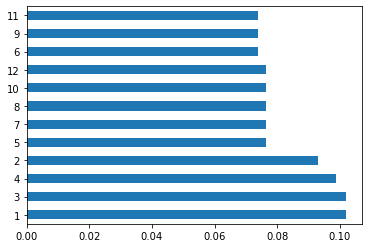

In [8]:
print(100*sdge_final_data.Month.value_counts(normalize = True))
100*sdge_final_data.Month.value_counts(normalize = True).plot.barh()
plt.show()

#### Observations
We observe that months Januay, February, March and April seem to have higher consumption. However, this is on account of data availability, which is from January 2019 to April 2022 - hence we have data for Jan-April 4 times vs 3 times for other months

1     3.289474
2     3.289474
28    3.289474
27    3.289474
26    3.289474
25    3.289474
24    3.289474
23    3.289474
22    3.289474
21    3.289474
20    3.289474
19    3.289474
18    3.289474
17    3.289474
16    3.289474
15    3.289474
14    3.289474
13    3.289474
12    3.289474
11    3.289474
10    3.289474
9     3.289474
8     3.289474
7     3.289474
6     3.289474
5     3.289474
4     3.289474
3     3.289474
29    3.042763
30    2.960526
31    1.891447
Name: Day, dtype: float64


TypeError: unsupported operand type(s) for *: 'int' and 'AxesSubplot'

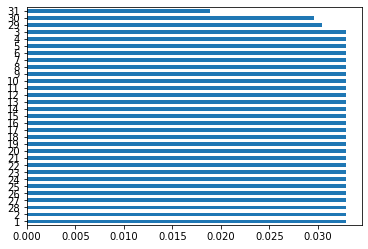

In [10]:
print(100*sdge_final_data.Day.value_counts(normalize = True))
100*sdge_final_data.Day.value_counts(normalize = True).plot.barh()
plt.show()

#### Observations
Distribution across days is almost equivalent except 31, primarily because is occurs only 7 out of 12 months

TypeError: unsupported operand type(s) for *: 'int' and 'AxesSubplot'

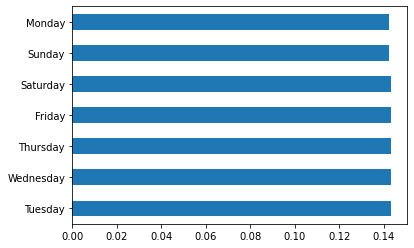

In [11]:
100*sdge_final_data.Week_day.value_counts(normalize = True).plot.barh()
plt.show()

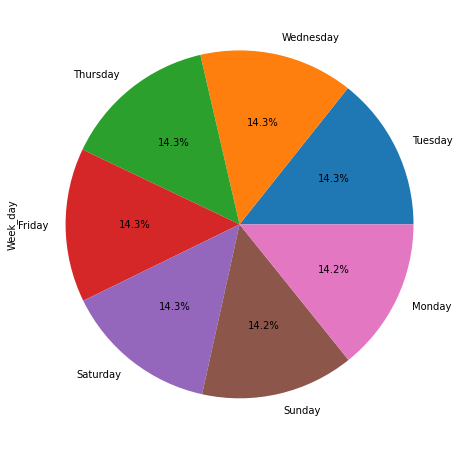

In [12]:
plt.figure(figsize=[8,8])
sdge_final_data.Week_day.value_counts(normalize = True).plot.pie(autopct = '%1.1f%%')
plt.show()

#### Observations
As expected, consumption across days (Monday to Sunday) is evenly spread

TypeError: unsupported operand type(s) for *: 'int' and 'AxesSubplot'

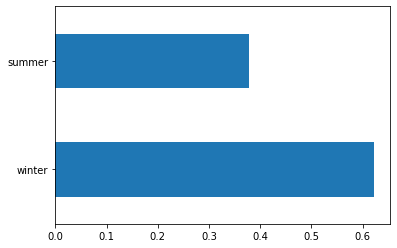

In [13]:
100*sdge_final_data.Season.value_counts(normalize = True).plot.barh()
plt.show()

#### Observations
Winter season has higher consumption vs summer, primarily because winters need more temperature control (heating) - both for starying at home, commercial as well as household stuff like bathing vs that in summers

TypeError: unsupported operand type(s) for *: 'int' and 'AxesSubplot'

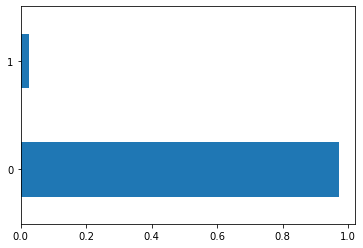

In [14]:
100*sdge_final_data.Holiday.value_counts(normalize = True).plot.barh()
plt.show()

#### Observations
Consumption on non-holidays is significantly higher than that on holidays. This is logical given very few people would be going to offices on holidays.

TypeError: unsupported operand type(s) for *: 'int' and 'AxesSubplot'

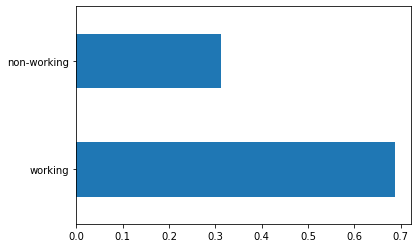

In [15]:
100*sdge_final_data.Non_working.value_counts(normalize = True).plot.barh()
plt.show()

#### Observations
Similar to holidays, working days have higher consumption than non-working days - this flows logically as consumption on non-working days will be lower owing to fewer people going to offices. However, there would be essential/ critical services that would continue even on non-working days (servers, cloud/ storage, etc.) and hence consumption still be there.

In [16]:
sdge_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1216 non-null   object 
 1   SDGE                      1216 non-null   float64
 2   Year                      1216 non-null   int64  
 3   Month                     1216 non-null   int64  
 4   Day                       1216 non-null   int64  
 5   Week_day                  1216 non-null   object 
 6   Season                    1216 non-null   object 
 7   Holiday                   1216 non-null   int64  
 8   Non_working               1216 non-null   object 
 9   DailyCoolingDegreeDays    1216 non-null   float64
 10  DailyHeatingDegreeDays    1216 non-null   float64
 11  HourlyDryBulbTemperature  1216 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 114.1+ KB


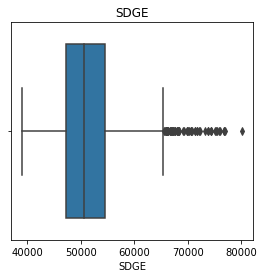

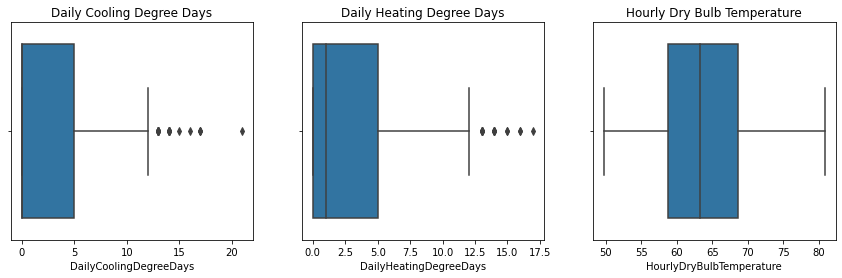

In [17]:
# Plot the histogram for Daily Cooling Degree Days, Daily Heating Degree Days and Hourly Dry Bulb Temprature
plt.figure(figsize = (20, 4))
plt.subplot(1,4,1)
plt.title("SDGE")
sns.boxplot(sdge_final_data['SDGE'])

plt.figure(figsize = (20, 4))
plt.subplot(1,4,2)
plt.title("Daily Cooling Degree Days")
sns.boxplot(sdge_final_data['DailyCoolingDegreeDays'])

plt.subplot(1,4,3)
plt.title("Daily Heating Degree Days")
sns.boxplot(sdge_final_data['DailyHeatingDegreeDays'])

plt.subplot(1,4,4)
plt.title("Hourly Dry Bulb Temperature")
sns.boxplot(sdge_final_data['HourlyDryBulbTemperature'])
plt.show()

#### Observations
- Daily Cooling Degree Days: represents how hot the temperature was on a given day vs mean temperature. We observe that the temperature was hot by 5-12 degrees mostly with few outliers
- Daily Heating Degree Days: represents how cold the temperature was on a given day vs mean temperature. We observe that temperature was cold by 2-12 degrees mostly with few outliers reaching up to 17.5 degrees
- Hourly Dry Bulb Temperature: represents the temperature sensed by a dry thermometer. The temperature remains in 58-68 degrees half of the time and ranges between 50-82 degrees throughout the year

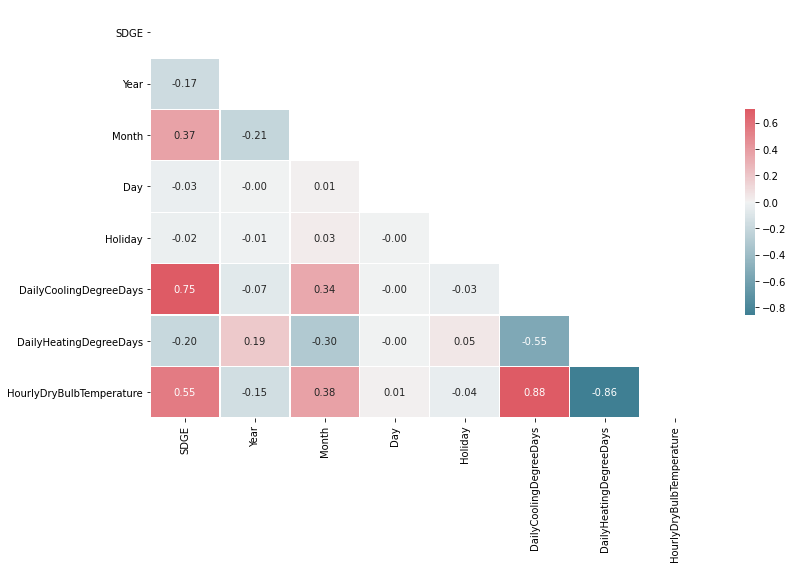

In [18]:
corr = sdge_final_data.corr()
plt.figure(figsize = (12,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# sns.heatmap(leads.corr(), annot = False, cmap="YlGnBu",vmax=.7, center=0)
sns.heatmap(corr, mask = mask, annot = True, fmt = ".2f", cmap=cmap,vmax=.7, center=0,cbar_kws={"shrink": .5},linewidths=.3)

# sns.heatmap(leads.corr(), mask=mask, cmap=cmap, vmax=.7, center=0, square = True, annot = True,cbar_kws={"shrink": .5},linewidths=.3)
plt.tight_layout()
plt.show()

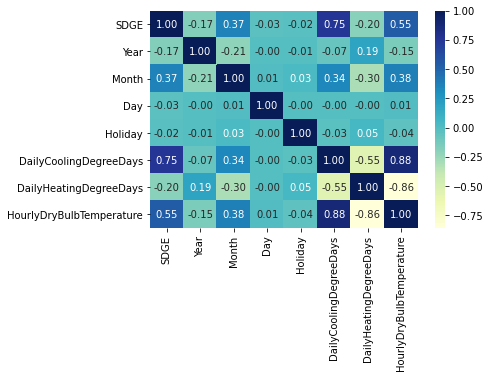

In [19]:
fig = plt.figsize = (18, 18)
sns.heatmap(sdge_final_data.corr(), annot = True, fmt = ".2f", cmap="YlGnBu")
plt.show();

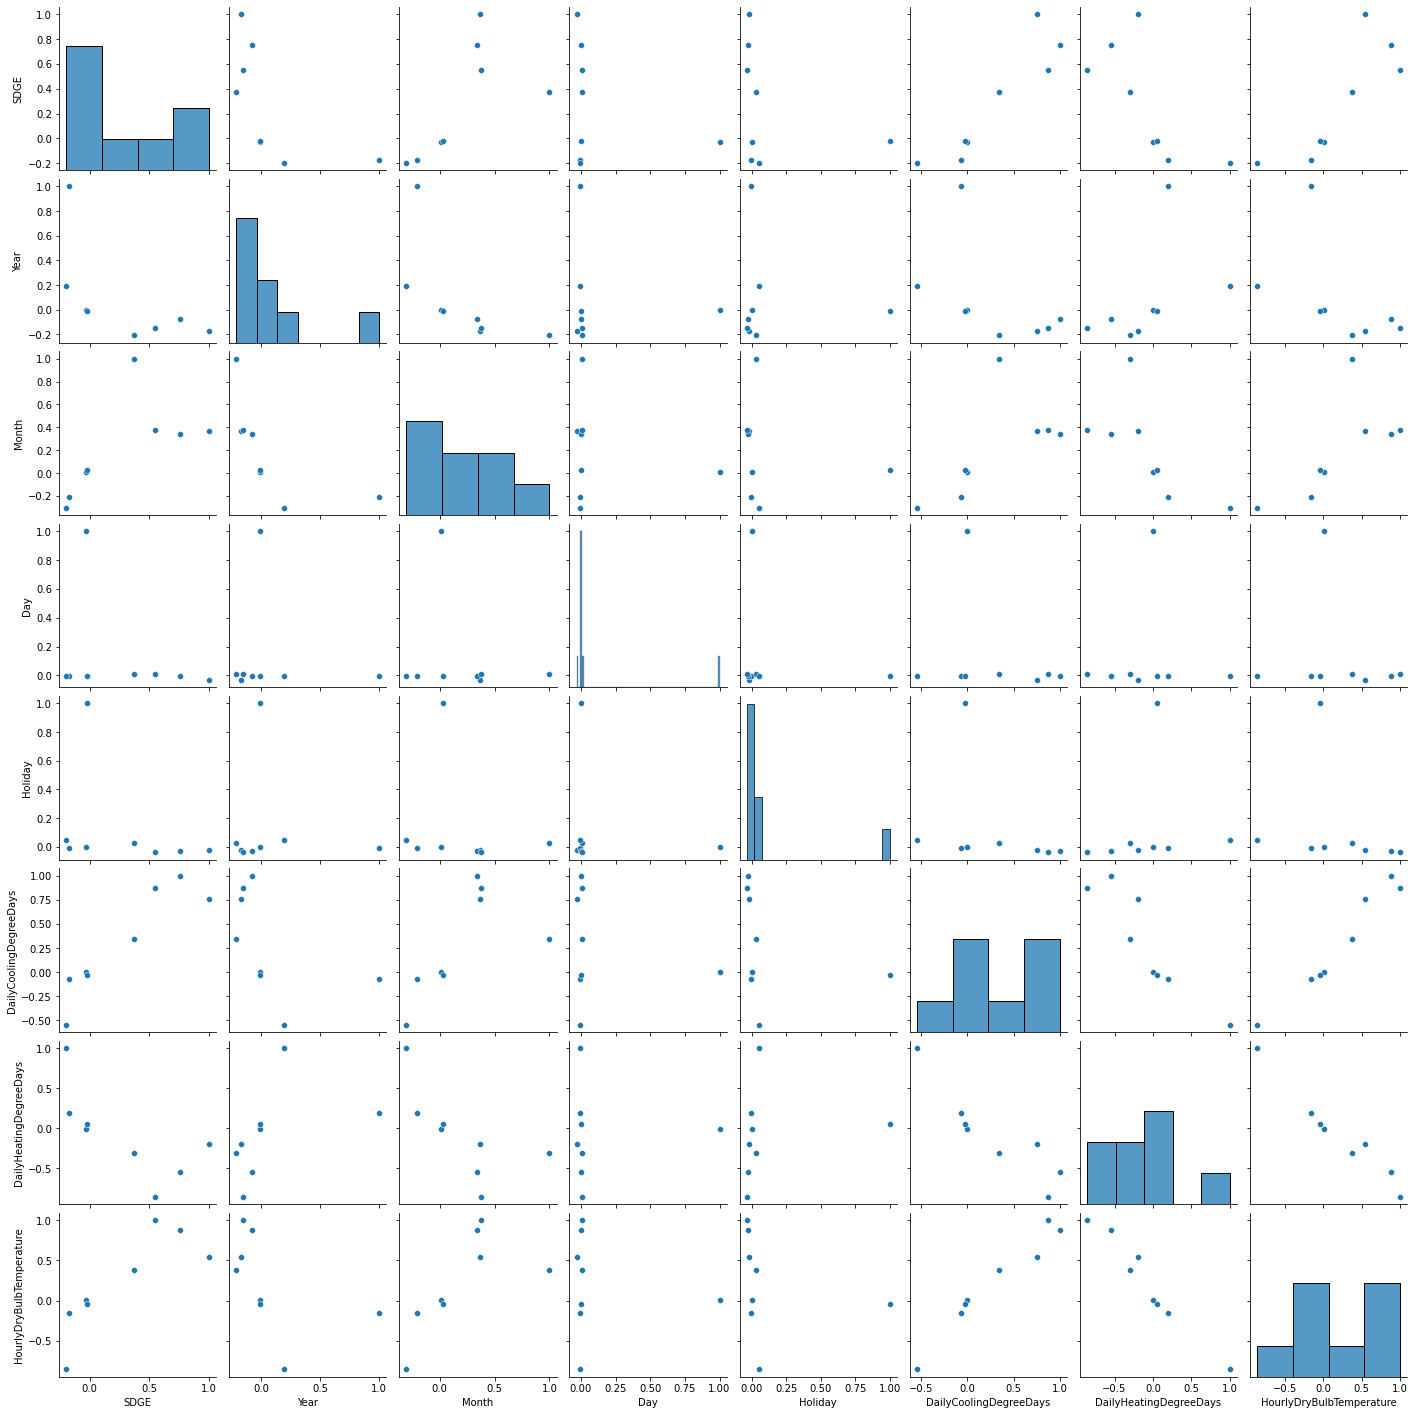

In [20]:
fig = plt.figsize = (18, 18)
sns.pairplot(sdge_final_data.corr())
plt.show();

#### Observations
- Daily Cooling Degree Days vs Hourly Dry Bulb Measure: High correlation (+0.88) => more the heat as measured by the dry thermometer, more the cooling degrees
- Daily Heating Degree Days vs Hourly Dry Bulb Measure: High negative correlation (-0.86) => lower the heat as measured by the dry bulb thermometer, more the heating degrees
- Daily Cooling Degree Days vs SDGE: High positive correlation (+0.75) => this is logical as when the days are hot, more cooling will be required, resulting in more energy consumption
- Hourly Dry Bulb Temperature vs SDGE: Moderately high positive correlation (+0.55) => higher the temperature as measured by the dry bulb thermometer, more the requirement of cooling, hence higher energy consumption

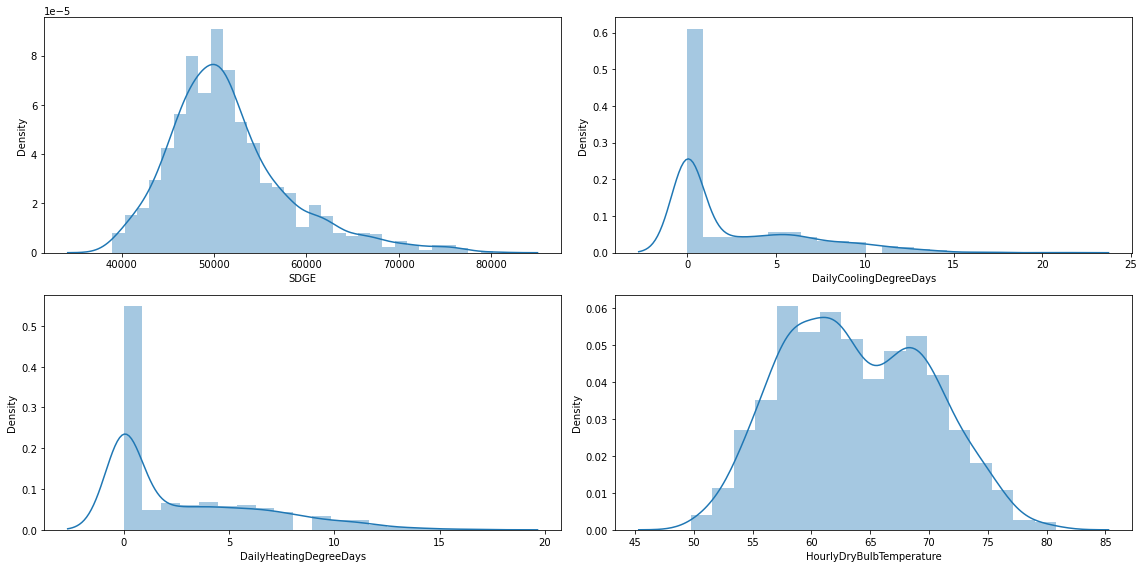

In [21]:
fig, axes = plt.subplots(2,2, figsize = (16,8))
features = ['SDGE', 'DailyCoolingDegreeDays', 'DailyHeatingDegreeDays', 'HourlyDryBulbTemperature']
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(sdge_final_data[i[1]])
plt.tight_layout()
# fig.delaxes(axes[1][1])
# fig.delaxes(axes[1][2])
plt.show()

#### Observations:
- SDGE: Looks almost normal but is right skewed. While most of the users energy demand and hence SDGE lies between 40000 to 60000 units, there are a few heavy users. The minimum usage however is around 40000 => this could be because of a minimum threshold setup by the power company
- Daily Cooling Degree Days: This is heavily skewed.
- Daily Heating Degree Days:
- Hourly Dry Bulb Temperature: The curve looks bi-modal. Majority of the times the temperature ranges between 55-70 degrees